In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read csv file

In [287]:
url = 'https://drive.google.com/file/d/1r1uTD3yja3oRPwUpY4QanfyBBFUSHwQf/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

In [288]:
data.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07


In [289]:
#Xem có bao nhiêu problem
data['problem_id'].nunique()

634

# Discover Data

In [290]:
data.shape

(264606, 12)

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [292]:
data.isna().sum()

id               0
assignment_id    0
problem_id       0
user_id          0
is_final         0
status           1
pre_score        0
coefficient      0
file_name        0
language_id      0
created_at       0
updated_at       0
dtype: int64

=> 1 status null và các dữ liệu còn lại đầy đủ

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


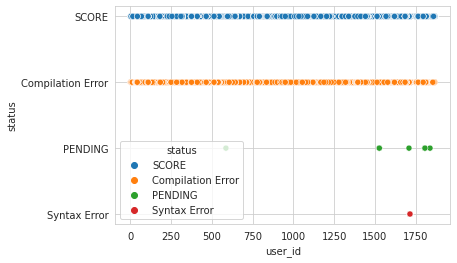

In [293]:
sns.scatterplot(data['user_id'],data['status'], hue=data['status'])

In [294]:
data['user_id'].nunique()

1159

## Group data

In [295]:
data_grouped = data.groupby(data['user_id'])
data_grouped.head()

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
263816,265882,383,1,1452,0,Compilation Error,0,100,solution-upload-3110,2,2021-03-20 15:17:30,2021-03-20 15:46:58
263821,265887,383,1,1452,0,Compilation Error,0,100,solution-3115,2,2021-03-20 15:20:50,2021-03-20 15:20:50
263825,265891,383,1,1452,0,Compilation Error,0,100,solution-upload-3119,2,2021-03-20 15:23:39,2021-03-20 15:23:39
263831,265897,383,1,1452,0,Compilation Error,0,100,solution-3125,2,2021-03-20 15:27:07,2021-03-20 15:27:07


In [296]:
# Dem submit cua tung user_id
data_grouped['user_id'].count()

user_id
1         2
4        54
5         6
6       130
7         5
       ... 
1860     76
1862     12
1864    187
1865     99
1868     47
Name: user_id, Length: 1159, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


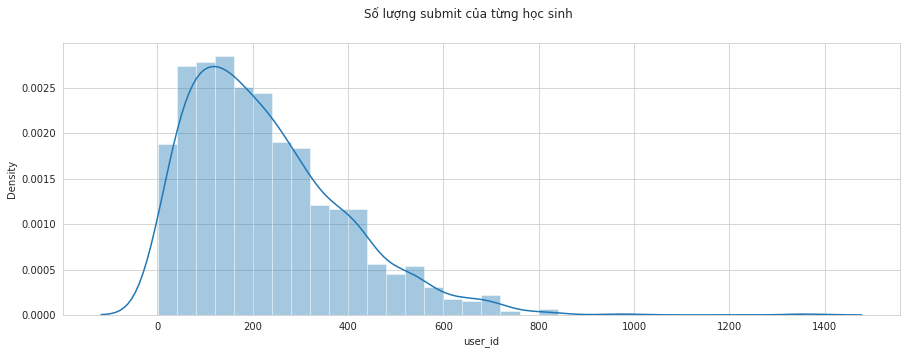

In [297]:
fig = plt.figure(figsize=(15,5))
fig.suptitle("Số lượng submit của từng học sinh")
sns.set_style('whitegrid')
sns.distplot(data_grouped['user_id'].count(),hist= True)
plt.show()

## Nhận xét

* Số lượng submit nhiều nhất rơi vào khoảng user_id từ user_id 40 -> 240.
* Càng về sau số lần submit càng giảm.

# Xem thử tổng điểm của từng sinh viên

In [298]:
sum_score = data.groupby(['user_id', "problem_id"])
# Điểm cao nhất mà từng user đạt được theo từng problem
sum_score = sum_score['pre_score'].max()

In [299]:
sum_score.head(20)

user_id  problem_id
1        81                0
         370           10000
4        3             10000
         4             10000
         5             10000
         6             10000
         7             10000
         8             10000
         9             10000
         81                0
         101           10000
         104           10000
         106           10000
         107           10000
         108           10000
         109           10000
         110           10000
         111           10000
         112           10000
         117           10000
Name: pre_score, dtype: int64

In [300]:
# Tạo 1 bảng đếm tổng lần submit mỗi user_id
time_submit = data_grouped['id'].count()
table  = time_submit.reset_index().rename(columns = {'id':'time_submit'})
table

,user_id,time_submit
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5
...,...,...
1154,1860,76
1155,1862,12
1156,1864,187
1157,1865,99


In [301]:
temp =[]
# lấy tổng điểm các problem của mỗi user 
for i in table['user_id']:
  temp.append(sum_score.get(i).sum())

print(temp)

[10000, 400000, 30000, 850000, 9209, 145601, 68000, 458666, 120000, 760299, 39000, 762760, 30000, 822888, 1437000, 979712, 1883388, 646888, 1798000, 962803, 601388, 666000, 225285, 984602, 380000, 973888, 1159627, 827888, 859888, 70000, 229285, 592000, 262888, 1649587, 0, 940077, 678388, 280000, 385533, 1834978, 1035978, 928888, 1021745, 647065, 877939, 2052333, 896363, 516000, 20000, 880000, 778288, 1275144, 1830318, 944173, 818888, 921964, 516370, 1006888, 707694, 950016, 400000, 47000, 920745, 1536232, 1064586, 878888, 487318, 919288, 245000, 1779388, 918888, 928047, 534000, 196333, 887000, 1782358, 968888, 945910, 410000, 858888, 50714, 1573448, 227000, 894820, 1038263, 470000, 576888, 786615, 984285, 241888, 790000, 1423000, 163602, 878839, 1289470, 640000, 296444, 1588888, 860000, 466500, 1451500, 978888, 879000, 978888, 878888, 878375, 1480837, 655888, 1853888, 685000, 868888, 956362, 230000, 978888, 776000, 878888, 210600, 1501714, 1141548, 978054, 139000, 1174491, 739777, 8808

-> Khó nhìn nên chuyển về dataframe

In [302]:
temp = pd.Series(temp)
# get user id
user = pd.Series(table['user_id'])

col = {'user':user, 'sum_score': temp}
sum_score = pd.DataFrame(col)
sum_score

,user,sum_score
0,1,10000
1,4,400000
2,5,30000
3,6,850000
4,7,9209
...,...,...
1154,1860,300221
1155,1862,40000
1156,1864,439741
1157,1865,116428


In [303]:
sum_score_submit = pd.concat([table, sum_score['sum_score']], axis= 1)
sum_score_submit

,user_id,time_submit,sum_score
0,1,2,10000
1,4,54,400000
2,5,6,30000
3,6,130,850000
4,7,5,9209
...,...,...,...
1154,1860,76,300221
1155,1862,12,40000
1156,1864,187,439741
1157,1865,99,116428


In [304]:
sum_score_submit.columns = ['id',	'time_submit',	'sum_score']

# Score data

In [305]:
url = 'https://drive.google.com/file/d/10AHkxC-qFoa0Jr6foRWA49RajyqrAsk-/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
score_Data = pd.read_csv(path)

In [306]:
score_Data.head()

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,8.05


Lấy 2 cột id và final score

In [307]:
final = score_Data[['id','CK']]
final

,id,CK
0,22,8.5
1,24,9.5
2,27,10
3,28,9.5
4,29,8.5
...,...,...
970,1857,4
971,1859,1.5
972,1862,7.5
973,1865,7.5


Ghép 2 bảng *sum_score_submit* và *final* lại

In [308]:
new_data = pd.DataFrame(sum_score_submit['id'])
new_data.columns=['id']

In [309]:
new_data

,id
0,1
1,4
2,5
3,6
4,7
...,...
1154,1860
1155,1862
1156,1864
1157,1865


In [310]:
new_data['Time_Submit'] = sum_score_submit['time_submit']

In [311]:
new_data

,id,Time_Submit
0,1,2
1,4,54
2,5,6
3,6,130
4,7,5
...,...,...
1154,1860,76
1155,1862,12
1156,1864,187
1157,1865,99


In [312]:
new_data['All_scores'] = sum_score_submit['sum_score']
new_data

,id,Time_Submit,All_scores
0,1,2,10000
1,4,54,400000
2,5,6,30000
3,6,130,850000
4,7,5,9209
...,...,...,...
1154,1860,76,300221
1155,1862,12,40000
1156,1864,187,439741
1157,1865,99,116428


In [313]:
new_data = pd.merge(new_data ,final, on='id',how='outer')
new_data

,id,Time_Submit,All_scores,CK
0,1,2.0,10000.0,NaN
1,4,54.0,400000.0,NaN
2,5,6.0,30000.0,NaN
3,6,130.0,850000.0,NaN
4,7,5.0,9209.0,NaN
...,...,...,...,...
1276,1638,NaN,NaN,8.5
1277,1664,NaN,NaN,9
1278,1679,NaN,NaN,6
1279,1723,NaN,NaN,9


In [314]:
new_data.dropna()

,id,Time_Submit,All_scores,CK
9,24,164.0,760299.0,9.5
10,27,13.0,39000.0,10
11,29,199.0,762760.0,8.5
13,34,218.0,822888.0,6.5
14,35,297.0,1437000.0,4.5
...,...,...,...,...
1151,1856,64.0,270790.0,7.5
1152,1857,55.0,337000.0,4
1153,1859,31.0,39000.0,1.5
1155,1862,12.0,40000.0,7.5


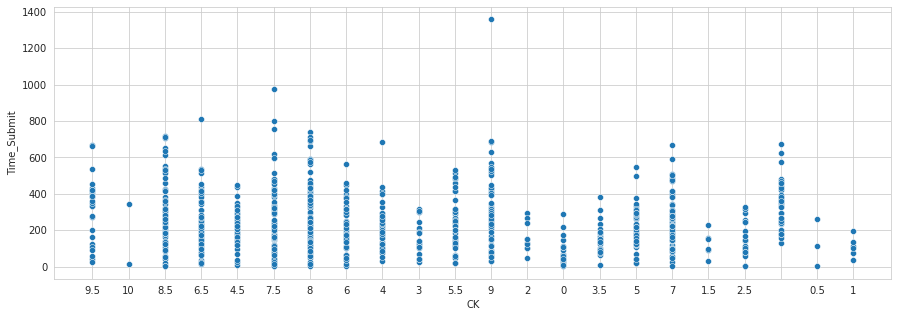

In [315]:
# Tổng số lần submit và điểm cuối kì
fig = plt.figure(figsize=(15,5))
sns.scatterplot(x=new_data['CK'], y=new_data['Time_Submit'])
plt.show()

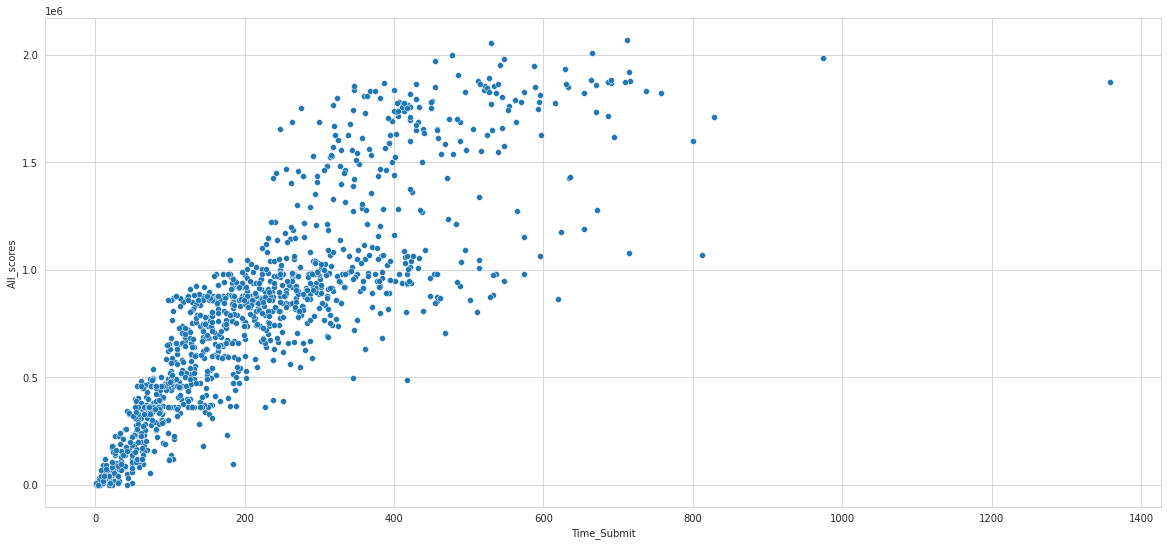

In [316]:
fig = plt.figure(figsize=(20,9))
sns.scatterplot(data=new_data,x='Time_Submit', y='All_scores')
plt.show()

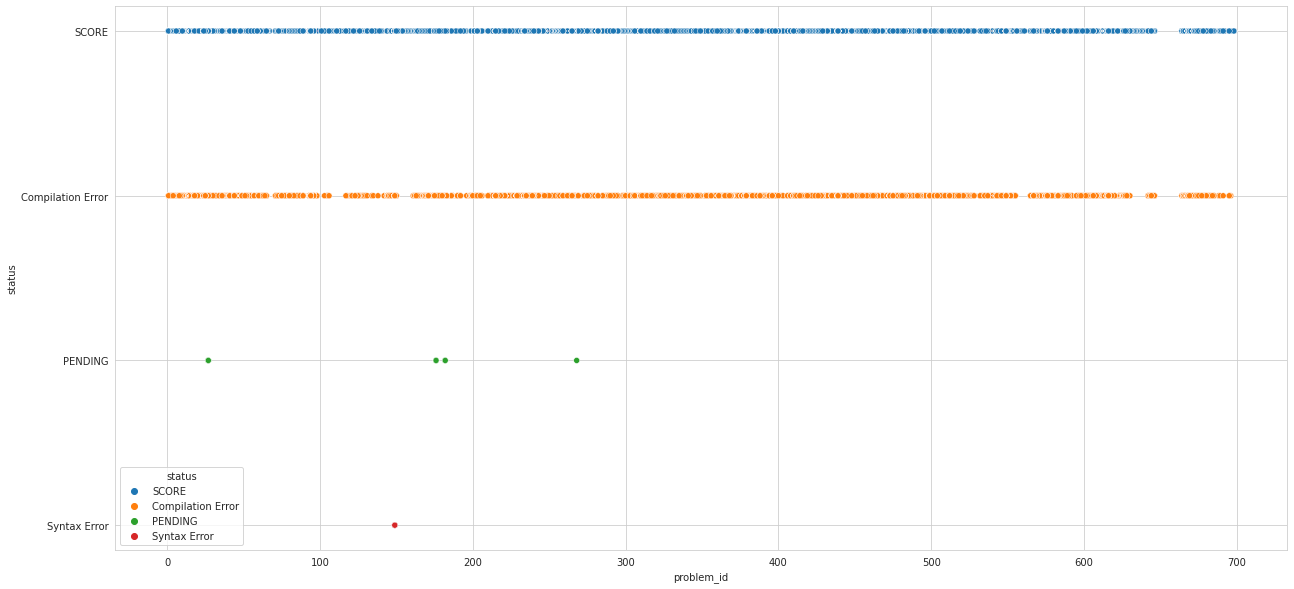

In [317]:
fig = plt.figure(figsize=(21,10))
sns.scatterplot(data=data,x='problem_id', y='status', hue='status')
plt.show()

In [318]:
num_problem=pd.unique(data['problem_id'])
n=len(num_problem)
print(n)

634


In [319]:
temp = pd.DataFrame(data['user_id'])
temp['Total_Problems_Submit'] = pd.DataFrame(data['is_final'])
temp.insert(2,'Time_Submits', 1)
temp['Total_Correct_Submits'] = pd.DataFrame(map(int, (data['pre_score'] == 10000)))
temp['Total_Correct_Problems'] = pd.DataFrame(map(int, (data['pre_score'] == 10000) & (data['is_final'] == 1)))
temp.columns =['id','Total_Problems_Submit', 'Time_Submits', 'Total_Correct_Submits', 'Total_Correct_Problems']
temp = temp.groupby(['id']).sum()

In [320]:
temp

,Total_Problems_Submit,Time_Submits,Total_Correct_Submits,Total_Correct_Problems
id,,,,
1,2,2,1,1
4,38,54,44,37
5,5,6,3,3
6,88,130,89,85
7,2,5,0,0
...,...,...,...,...
1860,48,76,29,28
1862,6,12,4,4
1864,63,187,30,28


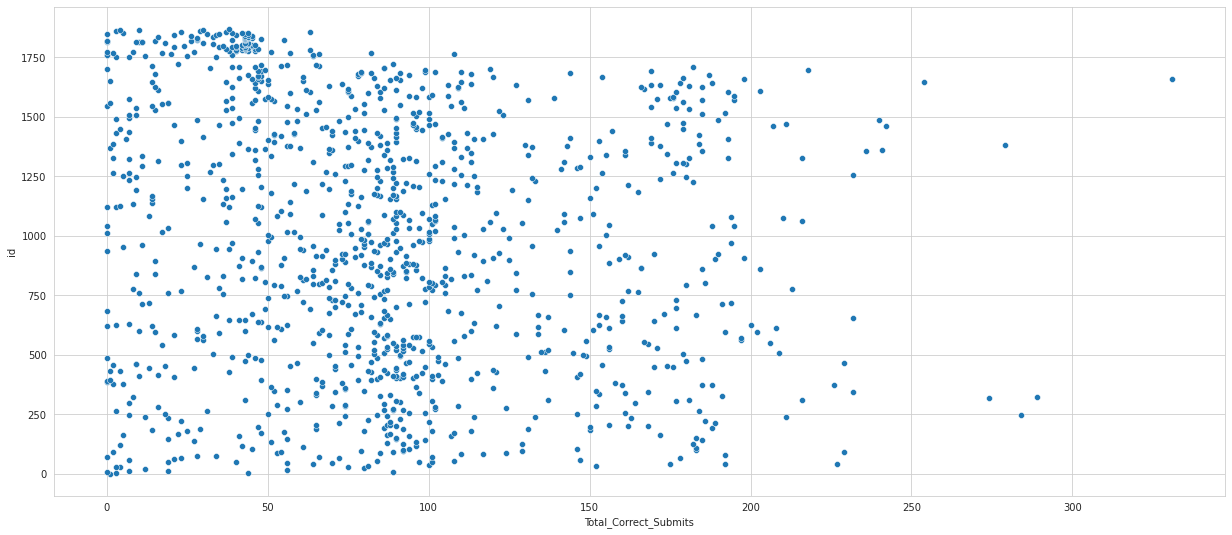

In [321]:
fig = plt.figure(figsize=(21,9))
sns.scatterplot(data=temp,x='Total_Correct_Submits', y='id')
plt.show()

In [322]:
temp['Correct_on_total'] = (temp['Total_Correct_Problems']/temp['Total_Problems_Submit'])

In [323]:
# Số lần submit / tổng số problem
temp['Submit_rate'] = (temp['Total_Problems_Submit'] / n)

In [324]:
temp

,Total_Problems_Submit,Time_Submits,Total_Correct_Submits,Total_Correct_Problems,Correct_on_total,Submit_rate
id,,,,,,
1,2,2,1,1,0.500000,0.003155
4,38,54,44,37,0.973684,0.059937
5,5,6,3,3,0.600000,0.007886
6,88,130,89,85,0.965909,0.138801
7,2,5,0,0,0.000000,0.003155
...,...,...,...,...,...,...
1860,48,76,29,28,0.583333,0.075710
1862,6,12,4,4,0.666667,0.009464
1864,63,187,30,28,0.444444,0.099369


Có vẻ như cột Correct on total sẽ gây ra sai lệch do nộp rất ít nhưng tỉ lệ đúng cực kì cao => **có vấn đề**

In [325]:
# Chỉnh sửa tỉ lệ bài đúng và số bài nộp so với tổng số bài
temp_value = temp['Submit_rate']*temp['Correct_on_total']
temp['Correct_on_total'] = temp_value

In [326]:
print(temp['Submit_rate'].max())

0.5031545741324921


<function matplotlib.pyplot.show>

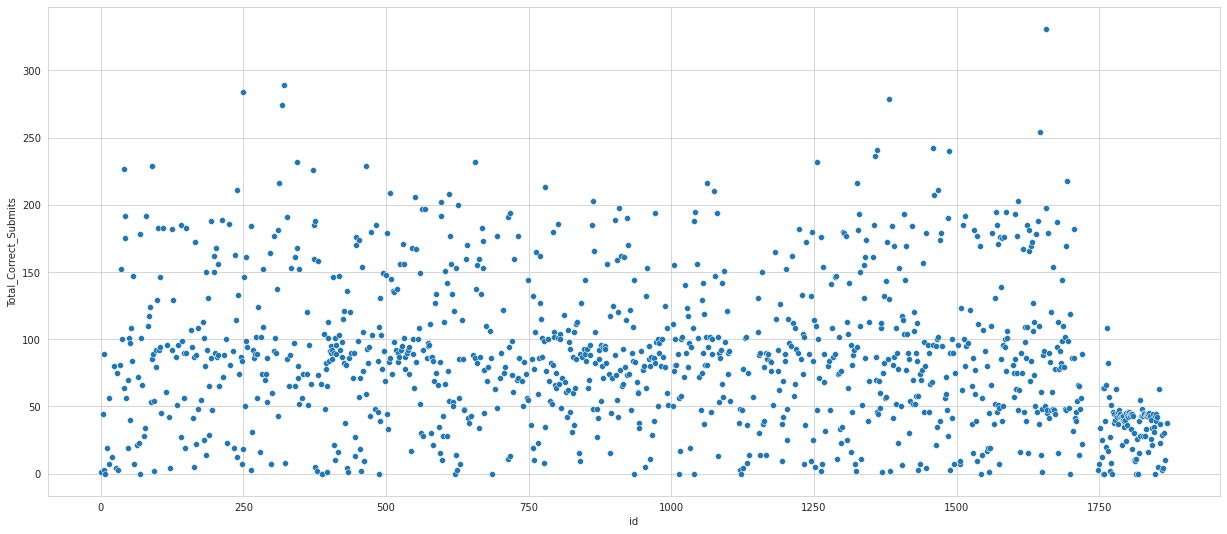

In [327]:
fig = plt.figure(figsize=(21,9))
sns.scatterplot(data=temp, x='id', y='Total_Correct_Submits')
plt.show

In [328]:
temp

,Total_Problems_Submit,Time_Submits,Total_Correct_Submits,Total_Correct_Problems,Correct_on_total,Submit_rate
id,,,,,,
1,2,2,1,1,0.001577,0.003155
4,38,54,44,37,0.058360,0.059937
5,5,6,3,3,0.004732,0.007886
6,88,130,89,85,0.134069,0.138801
7,2,5,0,0,0.000000,0.003155
...,...,...,...,...,...,...
1860,48,76,29,28,0.044164,0.075710
1862,6,12,4,4,0.006309,0.009464
1864,63,187,30,28,0.044164,0.099369


<function matplotlib.pyplot.show>

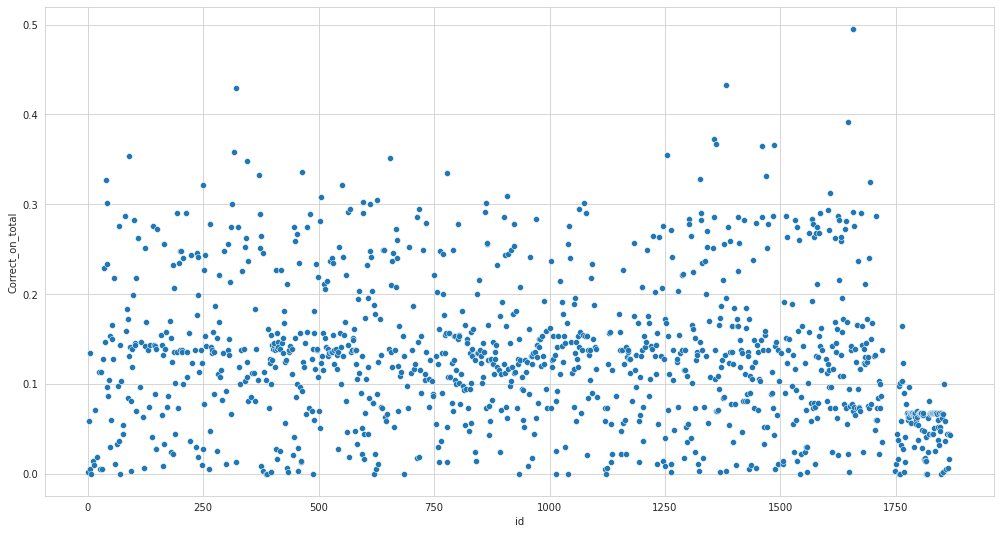

In [329]:
fig = plt.figure(figsize=(17,9))
sns.scatterplot(data=temp, x='id', y='Correct_on_total')
plt.show

Xóa các cột không quan trọng từ file score, chỉ giữ lại id và CK các feature còn lại không liên quan đến dự đoán.

In [330]:
final = score_Data.drop(columns=['QT','GK','TH','TBM','TBTL'])
# Xóa các hàng có giá trị " "
final = final.where(final['CK'] != '\xa0')
final

,id,CK
0,22.0,8.5
1,24.0,9.5
2,27.0,10
3,28.0,9.5
4,29.0,8.5
...,...,...
970,1857.0,4
971,1859.0,1.5
972,1862.0,7.5
973,1865.0,7.5


In [331]:
final['CK'].head(20)

0     8.5
1     9.5
2      10
3     9.5
4     8.5
5       9
6     6.5
7     4.5
8       7
9     7.5
10      8
11      8
12    7.5
13      6
14      5
15    7.5
16      4
17      3
18    5.5
19    NaN
Name: CK, dtype: object

In [332]:
train_data = pd.merge(temp,final,how='inner', on=['id'])

In [333]:
train_data

,id,Total_Problems_Submit,Time_Submits,Total_Correct_Submits,Total_Correct_Problems,Correct_on_total,Submit_rate,CK
0,24,77,164,80,72,0.113565,0.121451,9.5
1,27,5,13,4,3,0.004732,0.007886,10
2,29,80,199,75,72,0.113565,0.126183,8.5
3,34,84,218,81,81,0.127760,0.132492,6.5
4,35,151,297,152,145,0.228707,0.238170,4.5
...,...,...,...,...,...,...,...,...
802,1856,31,64,23,23,0.036278,0.048896,7.5
803,1857,40,55,37,37,0.058360,0.063091,4
804,1859,30,31,3,3,0.004732,0.047319,1.5
805,1862,6,12,4,4,0.006309,0.009464,7.5


In [334]:
train_data.isna().sum()

id                        0
Total_Problems_Submit     0
Time_Submits              0
Total_Correct_Submits     0
Total_Correct_Problems    0
Correct_on_total          1
Submit_rate               0
CK                        1
dtype: int64

In [335]:
train_data.dropna(inplace=True)

In [336]:
train_data['CK']

0      9.5
1       10
2      8.5
3      6.5
4      4.5
      ... 
802    7.5
803      4
804    1.5
805    7.5
806    7.5
Name: CK, Length: 805, dtype: object

In [337]:
train_data['CK']=train_data['CK'].astype(str).astype(float)

In [338]:
train_data.isna().sum()

id                        0
Total_Problems_Submit     0
Time_Submits              0
Total_Correct_Submits     0
Total_Correct_Problems    0
Correct_on_total          0
Submit_rate               0
CK                        0
dtype: int64

In [339]:
train_data=train_data.sort_values(by=['CK'],ignore_index=True)

In [340]:
train_data

,id,Total_Problems_Submit,Time_Submits,Total_Correct_Submits,Total_Correct_Problems,Correct_on_total,Submit_rate,CK
0,1505,8,8,7,7,0.011041,0.012618,0.0
1,1122,1,3,0,0,0.000000,0.001577,0.0
2,76,29,58,28,28,0.044164,0.045741,0.0
3,823,48,109,46,46,0.072555,0.075710,0.0
4,562,31,92,30,29,0.045741,0.048896,0.0
...,...,...,...,...,...,...,...,...
800,1328,189,671,193,184,0.290221,0.298107,9.5
801,264,181,430,184,176,0.277603,0.285489,9.5
802,24,77,164,80,72,0.113565,0.121451,9.5
803,343,191,345,168,166,0.261830,0.301262,10.0


<function matplotlib.pyplot.show>

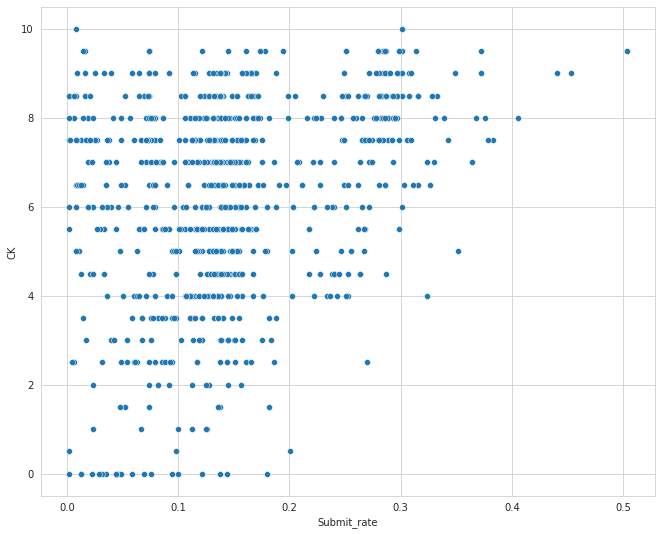

In [341]:
# tỉ lệ nộp bài so với điểm thi cuối kì
fig = plt.figure(figsize=(11,9))
sns.scatterplot(data=train_data,  
                x='Submit_rate',  
                y='CK')
plt.show

<function matplotlib.pyplot.show>

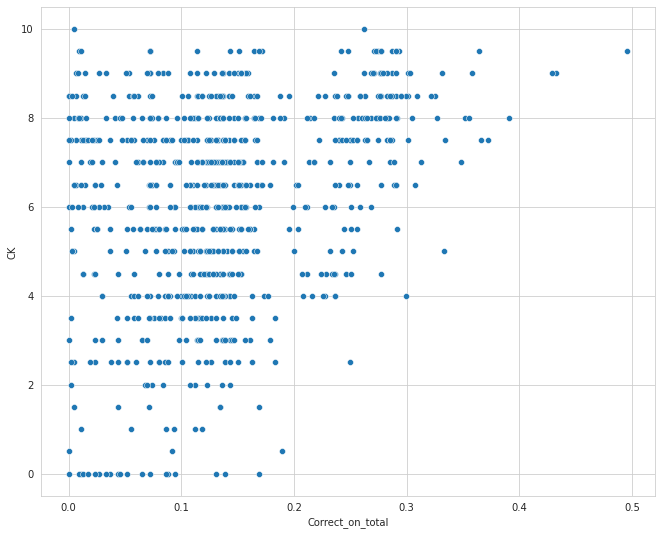

In [342]:
fig = plt.figure(figsize=(11,9))
sns.scatterplot(data=train_data,  
                x='Correct_on_total',  
                y='CK')
plt.show

In [358]:
temp=train_data.drop(columns=['id','Total_Problems_Submit'])
temp

,Time_Submits,Total_Correct_Submits,Total_Correct_Problems,Correct_on_total,Submit_rate,CK
0,8,7,7,0.011041,0.012618,0.0
1,3,0,0,0.000000,0.001577,0.0
2,58,28,28,0.044164,0.045741,0.0
3,109,46,46,0.072555,0.075710,0.0
4,92,30,29,0.045741,0.048896,0.0
...,...,...,...,...,...,...
800,671,193,184,0.290221,0.298107,9.5
801,430,184,176,0.277603,0.285489,9.5
802,164,80,72,0.113565,0.121451,9.5
803,345,168,166,0.261830,0.301262,10.0


In [345]:
from sklearn.model_selection import train_test_split

In [360]:
X_1 = temp.iloc[:, :-1]
y_1 = temp.iloc[:, -1:]
x_train, X_test, y_train, y_test = train_test_split(X_1, y_1,
                                                    test_size=0.1)

x_train.head(10)

,Time_Submits,Total_Correct_Submits,Total_Correct_Problems,Correct_on_total,Submit_rate
718,161,86,86,0.135647,0.137224
19,114,85,83,0.130915,0.137224
752,271,93,90,0.141956,0.141956
660,574,254,248,0.391167,0.405363
139,261,114,112,0.176656,0.201893
356,238,85,84,0.132492,0.141956
506,255,147,141,0.222397,0.247634
593,28,10,10,0.015773,0.018927
780,422,185,176,0.277603,0.287066
377,69,48,47,0.074132,0.077287


#Scale data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [363]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_test = scaler.transform(X_test)

In [364]:
x_train

array([[-0.48330561, -0.10012238, -0.02930218, -0.02930218, -0.12537887],
       [-0.76814885, -0.1175538 , -0.08480397, -0.08480397, -0.12537887],
       [ 0.18334878,  0.02189754,  0.04470019,  0.04470019, -0.07112759],
       ...,
       [ 0.97121306,  1.12007685,  1.09923409,  1.09923409,  1.32132196],
       [-0.3863377 , -0.1175538 , -0.15880635, -0.15880635, -0.21579767],
       [ 1.09848344,  1.48613662,  1.37674302,  1.37674302,  1.41174076]])

# Train model

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn import tree

## Linear Regression

In [371]:
model = LinearRegression()
model.fit(x_train, y_train)
# predict
y_pred = model.predict(X_test)

In [372]:
# Mean square error with original data
print('mean square error: ', mean_squared_error(y_test,y_pred))

mean square error:  4.544414705602738


In [373]:
y_pred = np.round((y_pred*2))/2
y_pred[:10]

array([[6.5],
       [8. ],
       [8.5],
       [7. ],
       [5.5],
       [6. ],
       [6.5],
       [5.5],
       [5.5],
       [6.5]])

## Logistic Regression

In [ ]:
y1_train = np.round(y_train*2)
y1_train = y1_train.astype(int)
y1_train

In [378]:
model=LogisticRegression()
model.fit(x_train,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [379]:
y_pred_lr = model.predict(X_test)
# Mean square error with original data
print('mean square error: ', mean_squared_error(y_test,y_pred_lr/2))

mean square error:  6.947204968944099


In [380]:
y_pred_lr = y_pred_lr/2
y_pred_lr

array([8. , 9. , 8. , 8. , 7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 8. ,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 0. , 8. , 7.5, 7.5, 8. , 7.5, 7.5,
       7.5, 7.5, 9. , 7.5, 7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 8. , 7.5,
       8. , 7.5, 7.5, 8. , 8. , 7.5, 7.5, 8. , 7.5, 7.5, 7.5, 7.5, 8. ,
       7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 4.5, 8. , 8. , 8. , 7.5, 7.5,
       8. , 8. , 7.5, 4.5, 7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 9.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       8. , 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 0. ,
       7.5, 7.5, 7.5, 7.5, 8. , 8. , 7.5, 7.5, 4.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 0. , 7.5, 7.5, 8. , 0. , 4.5, 8. , 8. , 8. , 7.5,
       7.5, 8. , 8. , 7.5, 7.5, 7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 8. , 7.5, 8. , 7.5, 7.5, 8. , 7.5, 8. , 7.5, 8. ,
       7.5, 7.5, 7.5, 8. , 8. ])

## SVM

In [381]:
# train with svm
model = svm.SVC()
model.fit(x_train,y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [382]:
y_pred_svm = model.predict(X_test)
# Mean square error with original data
print('mean square error: ', mean_squared_error(y_test,y_pred_svm/2))

mean square error:  6.678571428571429


In [383]:
y_pred_svm = y_pred_svm/2
y_pred_svm

array([8. , 8. , 8. , 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 7. , 7.5, 7.5, 8. ,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 8. , 7.5, 7.5, 8. , 7.5, 7.5,
       7.5, 7.5, 8. , 7.5, 7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 8. , 7.5,
       7. , 7.5, 7.5, 8. , 8. , 7.5, 7.5, 8. , 7. , 7.5, 7.5, 7.5, 8. ,
       7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7. , 8. , 7.5, 7.5, 7.5,
       7. , 7. , 7.5, 7.5, 7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 8. , 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7. , 7.5,
       7.5, 7.5, 7.5, 7.5, 7. , 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7. , 7.5, 7.5, 7.5, 8. , 7.5, 7.5, 7.5, 8. , 8. , 7.5,
       7.5, 8. , 8. , 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5,
       7.5, 7.5, 7.5, 7. , 7.5, 8. , 7.5, 7.5, 7. , 7.5, 7.5, 7.5, 8. ,
       7.5, 7.5, 7.5, 8. , 7. ])

##  Decision tree

In [385]:
# DecisionTree Classifier
model = tree.DecisionTreeClassifier()
model.fit(x_train,y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [386]:
y_pre = model.predict(X_test)
# Mean square error with original data
print('mean square error: ', mean_squared_error(y_test,y_pre/2))

mean square error:  7.6645962732919255


In [387]:
y_pre/2

array([ 9.5,  8.5,  8. ,  6. ,  7. ,  1.5,  6. ,  9. ,  6. ,  7.5,  3.5,
        4.5,  8. ,  2.5,  6.5,  6.5,  6. ,  5.5,  4. ,  4.5,  6. ,  7. ,
        7.5,  7.5,  7. ,  4. ,  9. ,  5. ,  8. ,  4. ,  2.5,  6.5,  0. ,
        1. ,  6.5,  9.5,  8.5,  7. ,  5.5,  8. ,  8. ,  4.5,  8.5,  7.5,
        4. ,  3.5,  7.5,  8. ,  4.5,  3. ,  5.5,  7.5,  7.5,  9. ,  7.5,
        6.5,  8.5,  3.5,  5. ,  6. ,  8. ,  6. ,  8. ,  7. ,  5.5,  8. ,
        8. ,  8.5,  4. ,  4.5,  7. ,  6.5,  8. ,  5.5,  7. ,  5.5,  7. ,
        3.5,  5.5,  7.5,  6. ,  6. ,  5.5,  6.5,  5.5,  7. ,  5.5,  4. ,
        2.5,  5. ,  3.5,  8.5,  5.5,  1. ,  2.5,  6.5,  4.5,  9. ,  3.5,
        9. ,  5.5,  8.5,  7. , 10. ,  5.5,  7. ,  7. ,  9. ,  8. ,  6.5,
        6.5,  8. ,  2.5,  5. ,  5.5,  4. ,  6. ,  3.5,  6. ,  8. ,  7.5,
        5. ,  6. ,  7.5,  0. ,  0. ,  6. ,  7. ,  7.5,  4.5,  5. ,  7.5,
        5.5,  8. ,  6. ,  5. ,  3.5,  9.5,  7.5,  8.5,  5.5,  5. ,  1. ,
        3.5,  3. ,  2.5,  6. ,  7.5,  6.5,  6. ,  4

# Other train method

## Random forest

In [388]:
from sklearn.ensemble import RandomForestClassifier

In [389]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train,y1_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [390]:
y_pre_rf = model.predict(X_test)
# Mean square error with original data
print('mean square error: ', mean_squared_error(y_test,y_pre_rf/2))

mean square error:  7.6645962732919255


## Gradient Boosting

In [391]:
from sklearn.ensemble import GradientBoostingClassifier

In [392]:
clf = GradientBoostingClassifier()
clf.fit(x_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [393]:
y_pre_gb = model.predict(X_test)
# Mean square error with original data
print('mean square error: ', mean_squared_error(y_test,y_pre_gb/2))

mean square error:  7.6645962732919255


In [394]:
y_pre_gb=y_pre_gb/2
y_pre_gb

array([ 9.5,  8.5,  8. ,  6. ,  7. ,  1.5,  6. ,  9. ,  6. ,  7.5,  3.5,
        4.5,  8. ,  2.5,  6.5,  6.5,  6. ,  5.5,  4. ,  4.5,  6. ,  7. ,
        7.5,  7.5,  7. ,  4. ,  9. ,  5. ,  8. ,  4. ,  2.5,  6.5,  0. ,
        1. ,  6.5,  9.5,  8.5,  7. ,  5.5,  8. ,  8. ,  4.5,  8.5,  7.5,
        4. ,  3.5,  7.5,  8. ,  4.5,  3. ,  5.5,  7.5,  7.5,  9. ,  7.5,
        6.5,  8.5,  3.5,  5. ,  6. ,  8. ,  6. ,  8. ,  7. ,  5.5,  8. ,
        8. ,  8.5,  4. ,  4.5,  7. ,  6.5,  8. ,  5.5,  7. ,  5.5,  7. ,
        3.5,  5.5,  7.5,  6. ,  6. ,  5.5,  6.5,  5.5,  7. ,  5.5,  4. ,
        2.5,  5. ,  3.5,  8.5,  5.5,  1. ,  2.5,  6.5,  4.5,  9. ,  3.5,
        9. ,  5.5,  8.5,  7. , 10. ,  5.5,  7. ,  7. ,  9. ,  8. ,  6.5,
        6.5,  8. ,  2.5,  5. ,  5.5,  4. ,  6. ,  3.5,  6. ,  8. ,  7.5,
        5. ,  6. ,  7.5,  0. ,  0. ,  6. ,  7. ,  7.5,  4.5,  5. ,  7.5,
        5.5,  8. ,  6. ,  5. ,  3.5,  9.5,  7.5,  8.5,  5.5,  5. ,  1. ,
        3.5,  3. ,  2.5,  6. ,  7.5,  6.5,  6. ,  4